# Exploratory Data Analysis

In [1]:
# In this section, we will explore several methods to see if certain features can be used to predict car price.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# import csv file
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

# read csv file into DataFrame
df = pd.read_csv(path)

# check for data
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Analyzing Individual Feature Patterns using Visualization

In [4]:
%%capture
! pip install seaborn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

How to choose the right visualization method?

In [6]:
# when visualizing individual variables, it is important to first understand what type of variable you are dealing with.

# list the data types for each column
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Question: What is the data type of the column "peak-rpm"?

In [7]:
df["peak-rpm"].dtypes

dtype('float64')

In [8]:
# we can calculate the correlation between variables of type int64 or float64 using "corr" method
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Question: Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [9]:
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


# Continuous numerical variables

In [10]:
# Continuous numerical variables are variables that may contain any value within some range.
# Continuous numerical variables can have the type "int64" or "float64"
# To visualize these variables we can do that using scatterplots with fitted lines.

In [11]:
# We can do this using "regplot" which plots the scatterplot plus the fitted regression line for the data

# we can examine the correlation between 'engine-size' and 'price'
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0, 56437.097974344957)

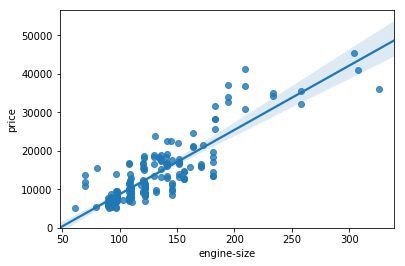

In [12]:
# engine-size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [13]:
# as the engine-size goes up, the price goes up: this indicates a positive direct correlation
# engine-size seems like a pretty good predictorof price

In [14]:
# we can examine the correlation between 'highway-mpg' and 'price'
df[["highway-mpg", "price"]].corr()


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


(0, 48288.569338525296)

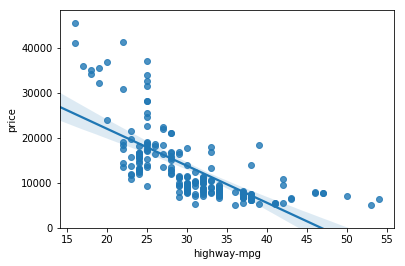

In [15]:
# highway-mpg as potential predictor variable of price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [16]:
# as the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship
# highway-mpg could potentially be a predictor for price

In [17]:
# we can examine the correlation between 'peak-rpm' and 'price'
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


(0, 47436.148325769056)

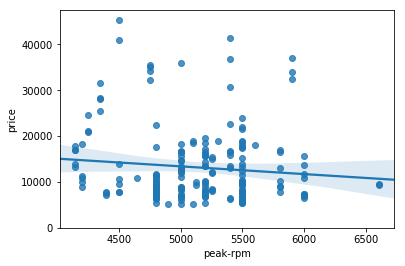

In [18]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [19]:
# peak-rpm does not seem to be a good predictor of the price: the regression line is close to horizontal
# data points are very scattered and far from the line, showing a lot of variability (weak linear relationship)

Question: Find the correlation between x="stroke", y="price"

In [20]:
# we examine the correlation between "stroke" and "price"
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


(0, 47436.154668888179)

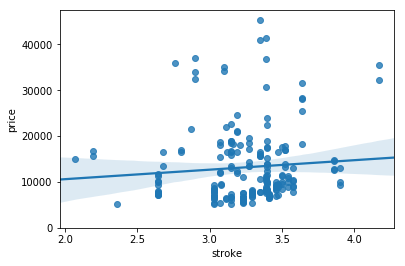

In [21]:
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

In [22]:
# stroke doesn't seem to be a good predictor of the price: the regression line is close to horizontal
# data points are very scattered and far from the line, showing a lot of variability (weak linear relationship)

# Categorical variables

In [23]:
# These are variables that describe a characterstic of a data unit, and are selected from a small group of categories.
# Categorical variables can have they type "object" or "int64"

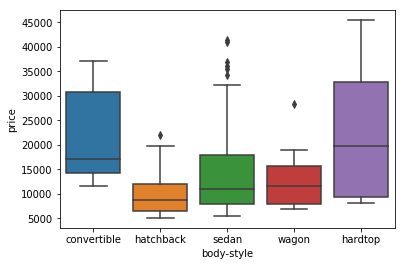

In [24]:
# we examine the relationship between "body-style" and "price"
sns.boxplot(x="body-style", y="price", data=df)

In [25]:
# the distribution of price between body-style categories has a significant overlap
# body style would not be a good predictor of price

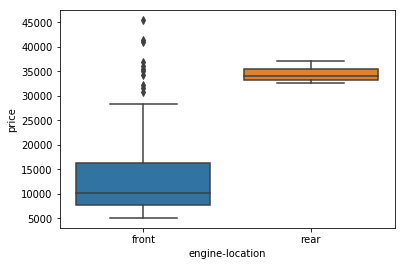

In [26]:
# we examine the relationship between 'engine-location' and 'price'
sns.boxplot(x="engine-location", y="price", data=df)

In [27]:
# the distribution of price between two-engine location categories, front and rear are distinct enough
# engine-location can be a potential good predictor of price

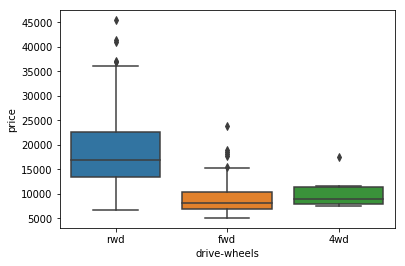

In [28]:
# we examine the relation between "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=df)

In [29]:
# the distribution of price of different drive-wheels categories differs
# drive-wheels could potentially be a predictor of price

# Descriptive Statistical Analysis

In [30]:
# The describe() method automatically computes basic statistics for all continuous variables.
# Any NaN values are automatically skipped in these statistics.

# The describe() method shows:
# - the count of that variable
# - the mean
# - the standard deviation (std)
# - the minimum value
# - the IQR (Interquartile Range: 25%, 50%, and 75%)
# - the maximum value

In [31]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [32]:
# the default value of describe() method skipps variables of type object.

In [33]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [34]:
# the include parameter will display all object types

# Value Counts

In [35]:
# is a good way of understanding how many units of each characteristics/variable we have.

# we can apply value_counts() method on the column "drive-wheels" (it only works on Pandas Series e.g df['drive-wheels'])
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [36]:
# we can convert to a data frame as follows:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [37]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive-wheels": "value_counts"}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [38]:
# we can rename our index to 'drive-wheels'
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [39]:
# we can repeat the process for variable 'engine-location'
engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_location_counts

,value_counts
front,198
rear,3


In [40]:
# we can rename our index to engine-location
engine_location_counts.index.name = 'engine-location'
engine_location_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


In [41]:
# examining the value counts of the engine location would not be a good predictor variable for the price.
# this is because we have only 3 cars with a rear engine and 198 with an fron engine (this result is skewed)
# therefore we cannot draw any conclusion about the engine location

# Basic of Grouping

In [42]:
# the groupby method groups data by different categories.
# data is grouped based on one or several variables and analysis is performed on the individual groups.

In [43]:
# let's group by the variable 'drive-wheels'
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [44]:
# if we want to know, on average which of drive wheel is most valuable, we can group drive-wheels and then average them.

# we can select the columns 'drive-wheels', 'body-style', and 'price'
df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [45]:
# we can calculate the average price for each of the different categories of data

# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [46]:
# it seems that rwd (rear-wheel drive) vehicles are on average the most expensive
# 4wd (four wheel-drive) and fwd (front wheel-drive) vehicles are aproximately the same in price.

In [47]:
# we can group also with multiple variables.
# we can group by both 'drive-wheels' and 'body-style'

# grouping results
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test_1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [48]:
# this grouped data is much easier to visualize when is made into a pivot table.
grouped_pivot = grouped_test_1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [49]:
# drive-wheels variable represents the rows of the table while body-style represents the columns of the table.

In [50]:
# often we won't have data for some of the pivot cells. 
# we can fill these missing values with the value 0, any other value can be used as well
# missing data is quite a complex subject and is an entire course on its own

In [51]:
# fill the missing values with 0 in the pivot table
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Question: Use the 'groupby' function to find the average 'price' of each car based on 'body-style'

In [52]:
df_group_two = df[['body-style', 'price']]
df_grouped_bodystyle = df_group_two.groupby(['body-style'], as_index=False).mean()
df_grouped_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

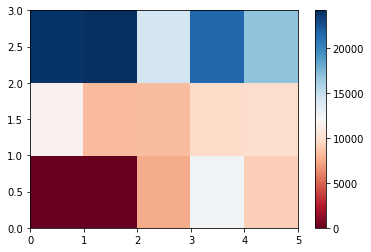

In [54]:
# variables drive-wheels and body-style vs price

# we can use a heatmap to visualize the relationship between body-style vs price
# use the grouped results

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [55]:
# the heatmap plots the target variable (price) proportional to color with respect to drive-wheels and body-style

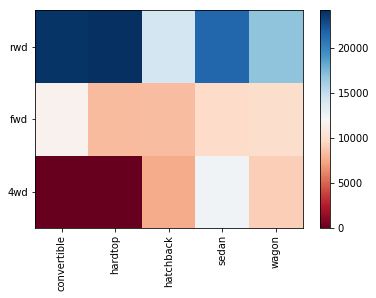

In [56]:
# we can make a better representation since the above representation does not give to much insight
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# label names
row_labels  = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Question: What are the main characteristics which have the most impact on the car price?

In [57]:
# To answer the question we look at the correlation of these variables with the car price
# we look at: how is the car price dependent on this variable?

# Correlation and Causation

Correlation: is a measure of the extent of the interdependence between variables

Causation: is the relationship between cause and effect between two variables

# Pearson Correlation

In [58]:
# The Pearson Correlation measures the linear dependence between two variables X and Y
# 1: represents Total positive linear correlation
# 0: represents No linear correlation, the two variables most likely do not affect each other
# -1: represents Total negative linear correlation

# the default method .corr() represents the Pearson Correlation
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


# P-value

In [59]:
# P-value is the probability value that the correlation between two variables is statistically significant
# we choose a significance level of 0.05 which means 95% we are confident that the correlation is significant betwee 2 variables

In [60]:
# By convention:
# p-value < 0.001 : Strong evidence that the correlation is significant
# p-value < 0.05:   Moderate evidence that the correlation is significant
# p-value < 0.01:   Weak evidence that the correlation is significant
# p-value > 0.01:   No evidence that the correlation is significant

In [61]:
from scipy import stats

In [62]:
# we can calculate the Pearson Correlation for wheel-base vs price:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P=", p_value)


The Pearson Correlation Coefficient is 0.584641822266  with a P-value of P= 8.07648827073e-20


In [63]:
# Conclusion:
# since the p-value < 0.001, the correlation between wheel-base and price is statistically significant
# although the linear relationship isn't extremely strong (~0.585)

In [64]:
# we can calculate Pearson Correlation for horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value:", p_value)

The Pearson Correlation Coefficient is 0.809574567004  with a P-value: 6.36905742826e-48


In [65]:
# Conclusion:
# since the p-value < 0.001, the correlation between horsepower and price is statistically significant
# the linear relationship is quite strong (~ 0.809, close to 1)

In [66]:
# we can calculate the Pearson Correlation between length and price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef, " with a P-value:", p_value)

The Pearson Correlation Coefficient is: 0.690628380448  with a P-value: 8.01647746616e-30


In [67]:
# Conclusion:
# since the p-value is < 0.001, the correlation between length and price is statistically significant
# and the linear relationship is moderately strong (~ 0.691)

In [68]:
# we can calculate the Pearson Correlation between width vs price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef, " with a P-value:", p_value)

The Pearson Correlation Coefficient is: 0.751265344052  with a P-value: 9.20033551048e-38


In [69]:
# Conclusion:
# since the p-value < 0.001, the correlation between width and price is statistically significant
# and the linear relationship is quite strong (~ 0.751)

In [70]:
# we can calculate the Pearson Correlation between engine-size vs price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef, " with a P-value:", p_value)

The Pearson Correlation Coefficient is: 0.872335167446  with a P-value: 9.2654916222e-64


In [71]:
# Conclusion:
# since p_value < 0.001 the correlation between engine-size and price is statistically significant
# and the linear relationship is very strong (~ 0.872)

In [72]:
# we can calculate Pearson Correlation between curb-weight vs price
pearson_coeff, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coeff, " with a P-value:", p_value)

The Pearson Correlation Coefficient is: 0.83441452577  with a P-value: 2.18957723889e-53


In [73]:
# Conclusion:
# since p_value < 0.001 the correlation between curb-weight and price is statistcally significant
# and the linear relationship is very strong (~ 0.834)

In [74]:
# we can calculate Pearson Correlation between bore and price
pearson_coeff, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coeff, " with a P-value:", p_value)

The Pearson Correlation Coefficient is: 0.543155383263  with a P-value: 8.04918948394e-17


In [75]:
# Conclusion:
# since p_value < 0.001 the correlation between bore and price is statistically significant
# and the linear relationship is only moderate (~ 0.521)

In [76]:
# we can calculate Pearson Correlation between city-mpg vs price
pearson_coeff, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coeff, " with a P-value:", p_value)

The Pearson Correlation Coefficient is: -0.686571006784  with a P-value: 2.32113206557e-29


In [77]:
# Conclusion:
# since p_value < 0.001 the correlation between city-mpg and price is statistically significant
# and the linear relationship is negative and moderately strong

In [78]:
# we can calculate Pearson Correlation between highway-mpg vs price
pearson_coeff, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coeff, " with a P-value:", p_value)

The Pearson Correlation Coefficient is: -0.704692265059  with a P-value: 1.74954711445e-31


In [79]:
# Conclusion:
# since p_value < 0.001 the correlation between highway-mpg and price is statistically significant
# and the linear relatioship is negative and moderately strong

# ANOVA: Analysis of Variance

In [80]:
# The Analysis of Variance is a statistical method used to test whether there are significant differences between
# the means of two or more groups.



# ANOVA returns two parameters:
# F-test score: calculates how much the actual means deviates from the assumption
#               a larger score means there is a large difference between the means



# P-value: tells how statistically significant is our calculated score value
# e.g If our price variable is strongly correlated witht the variable we are analyzing, expect ANOVA to return a high
# F-test score and a small P-value

In [81]:


# let's see if different types 'drive-wheels' impact 'price', we group the data
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby('drive-wheels')
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [82]:
df_gptest.head(10)

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [83]:
# we can obtain the values of the method group using the method get_group()

In [84]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [85]:
# we can use the function f_oneway in the module stats to obtain F-test score and P-value

# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print(" ANOVA results: F=", f_val, ", P=", p_val)

 ANOVA results: F= 67.9540650078 , P= 3.39454435772e-23


In [86]:
# Conclusion:
# great result: F-test score showing a strong correlation and P-value of olmost 0
# almost certain statistical significance

In [87]:
# Sperately: fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print(" ANOVA results: F=", f_val, " with P=", p_val)

 ANOVA results: F= 130.553316096  with P= 2.23553063557e-23


In [88]:
# Conclusion:
# great result with F-test score showing a strong correlation and P-value of almost 0
# almost certain statistical significance

In [89]:
# Separately: 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])
print("ANOVA results: F=", f_val, " with P=", p_val)

ANOVA results: F= 0.665465750252  with P= 0.416201166978


In [90]:
# Separately: 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
print("ANOVA results: F=", f_val, " with P=", p_val)

ANOVA results: F= 8.58068136892  with P= 0.00441149221123


# Conclusion: Important Variables

In [91]:
# We have a better idea of what our data looks like and which variables are important to take into account when
# predicting the car price.

# Continuous numerical variables:
# length
# width
# curb-weight
# engine-size
# horsepower
# city-mpg
# highway-mpg
# wheel-base
# bore

# Categorical variables:
# drive-wheels

In [92]:
# we move now into building machine learning models to automate our analysis
# feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance